# Forecasting


## Importing Libraries

In [5]:
#Libraries to handle dataframe
import numpy as np
import pandas as pd

# Importing Visualisation Libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [15, 5]

# Importing libraries to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Library for AdFuller test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

# Library for autocorrelation
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Library to import ARIMA model
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

# Libraries for regression metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [6]:
# Function to check MAPE value
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Importing Data

In [8]:
main_df = pd.read_csv("C:/Users/udit.pandey/Desktop/Forecasting DS certification test/Electric Production/Electric Production/Electric_Production_Dataset.csv")
main_df.head()

,DATE,IPG2211A2N
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


In [11]:
main_df.columns = ['Date', 'Power']
main_df.head()

,Date,Power
0,1/1/1985,72.5052
1,2/1/1985,70.6720
2,3/1/1985,62.4502
3,4/1/1985,57.4714
4,5/1/1985,55.3151


## Reading Data

In [12]:
# Statistical description 
main_df.describe()

,Power
count,397.000000
mean,88.847218
std,15.387834
min,55.315100
25%,77.105200
50%,89.779500
75%,100.524400
max,129.404800


In [13]:
# Checking datatypes of the colums
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 2 columns):
Date     397 non-null object
Power    397 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.3+ KB


The data is on mothly basis

## Converting datatypes of the columns

In [15]:
#Changing Date column to date_time 
main_df['Date'] = pd.to_datetime(main_df['Date'])

## Treating NULL and Duplicate Values

In [17]:
# To check for Null values present in the dataset
main_df.isnull().any()

Date     False
Power    False
dtype: bool

In [18]:
# To check if we have any duplicate values present in the dataframe 
main_df[main_df.duplicated()]

,Date,Power


> As we know we don't have **Null** and **Duplicate** values present in the data set, we can skip the treatment process

## Checking Outliers and Treating them 

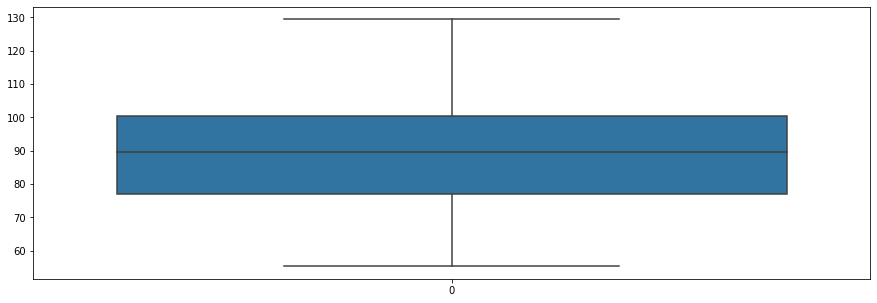

In [20]:
sns.boxplot(data= main_df['Power'])

> There's **no outliers** present in the dataset, so no need of treating them

## Checking the distribution of the target variable

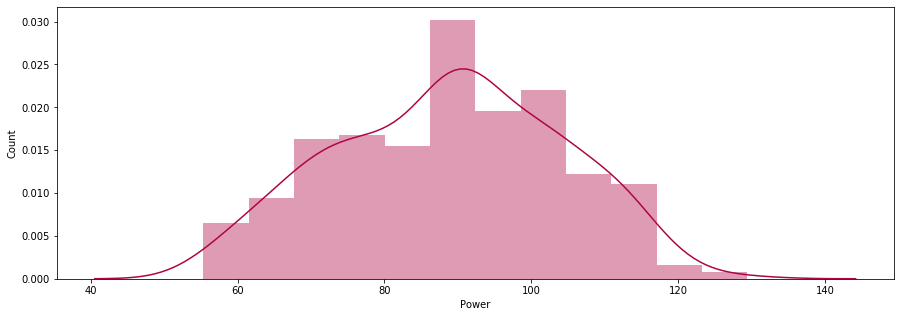

In [21]:
# Visualizing th edistribution of volume 
sns.distplot(main_df['Power'], kde = True, color ='#ad0543')
plt.ylabel('Count')
plt.show()

The distribution looks normal (Gaussian)

In [23]:
print("Minimum value in the dataframe is: {}\nMaximum value in the dataframe is: {}\nMedian of the dataframe is: {}".format(main_df['Power'].min(), main_df['Power'].max(), main_df['Power'].median()))

Minimum value in the dataframe is: 55.3151
Maximum value in the dataframe is: 129.4048
Median of the dataframe is: 89.7795


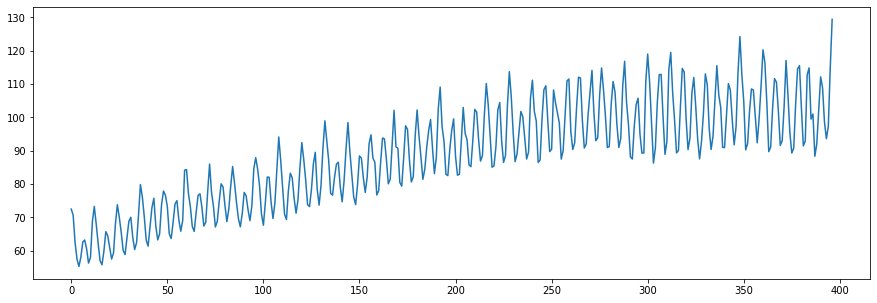

In [24]:
main_df['Power'].plot()

## Implementation of Models

<ol>
    <li> <b> Holt's Winter Model </b> </li>
    <li> <b> ARIMA Model </b> </li>
</ol>

## Splitting data into two 

In [124]:
# Test and Train
final_df = main_df[:]
final_df.set_index("Date", inplace = True)

In [125]:
# Splitting data into Train and Test
X = final_df.sort_values(by = 'Date')
train_size = int(len(X) * 0.80)
Train, Test = X[0:train_size], X[train_size:len(X)]

In [126]:
print("Length of Triain dataset is : {}\nLength of Test dataset is : {}".format(len(Train), len(Test)))

Length of Triain dataset is : 317
Length of Test dataset is : 80


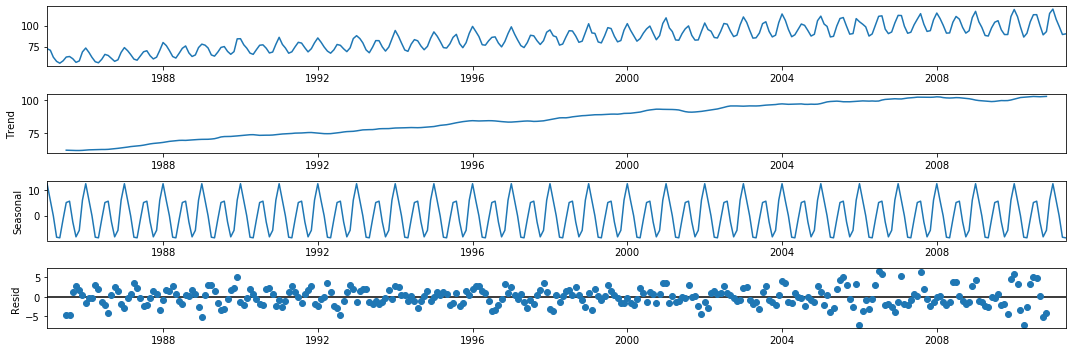

In [127]:
decomposition = sm.tsa.seasonal_decompose(Train, model='additive').plot()

# INSIGHTS

<ol>
    <li> From Univariate analysis from histogram we can conclude that data was <b>normally distributed</b>
    <li> There isn't any <b>Outliers</b> present in the dataset
    <li> There isn't any <b>Null</b> values present in the dataset
    <li> The dataset was on <b>Month level</b>
    <li> The dataset has <b>Seasonality</b> and <b>Trend</b> 

## Holt's Winter *

We can clearly see that there's a **Trend** along with **Seasonality** in the data

In [80]:
## Implementation of the exponential Smoothing Model
model = HWES(Train, seasonal_periods=12, trend='add', seasonal='add')
fitted = model.fit()

In [81]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    Power   No. Observations:                  317
Model:             ExponentialSmoothing   SSE                           1679.103
Optimized:                         True   AIC                            560.475
Trend:                         Additive   BIC                            620.617
Seasonal:                      Additive   AICC                           562.770
Seasonal Periods:                    12   Date:                 Mon, 23 Nov 2020
Box-Cox:                          False   Time:                         15:14:55
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.4396103                alpha                 True
smoothing_trend          

In [82]:
len(Test)

80

In [83]:
power_forecast = fitted.forecast(steps=80)

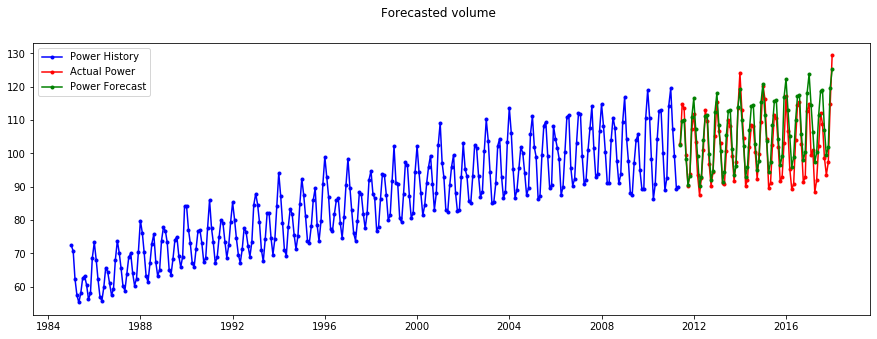

In [84]:
fig = plt.figure()
fig.suptitle('Forecasted volume')
past, = plt.plot(Train.index, Train, 'b.-', label='Power History')
future, = plt.plot(Test.index, Test, 'r.-', label='Actual Power')
predicted_future, = plt.plot(Test.index, power_forecast, 'g.-', label='Power Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()

### Error Metrics

In [85]:
print ('MAE: ' + str(mean_absolute_error(Test['Power'],power_forecast)))
print ('MSE: ' + str(mean_squared_error(Test['Power'],power_forecast)))
print ('RMSE: ' + str(sqrt(mean_squared_error(Test['Power'],power_forecast))))
print('MAPE: ',mean_absolute_percentage_error(Test['Power'],sales_forecast),"%")

MAE: 4.419561886248882
MSE: 28.1779636080626
RMSE: 5.308291967107932
MAPE:  4.3475157344242605 %


In [137]:
from sklearn.metrics import r2_score 
print("r2_score",r2_score(Test['Power'],power_forecast))

r2_score 0.6919919615213128


## ARIMA (Auto Regressive Integrated Moving Average) *

> Since we can see we have **Seasonality** and **Trend** present in our dataset, we'll check if our data is stationary or not

### To check the stationarity of the dataset

In [87]:
# Dicky-fuller test

#Ho : It is non stationary
#H1 : It is stationary

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean()
    rolstd = timeseries.rolling(window=7).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
#     plt.subplots(figsize=(15,5))
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Augmented Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value

    print(dfoutput)
    if dftest[1]<=0.05:
        print('\nStrong evidence against the null Hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary')
    else:
        print('\nWeak evidence against NULL hypothesis, time series has a unit root, indicating it is non stationary')
     
    print("\nMoving average mean is : ", rolmean.mean())

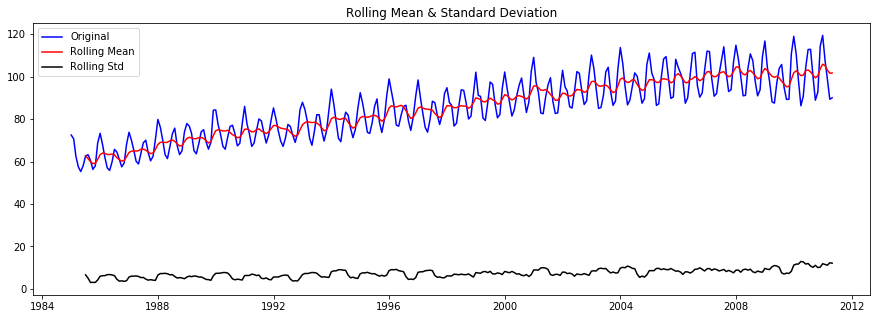

Results of Dickey Fuller Test:
Test Statistic                  -1.738695
p-value                          0.411294
#Lags Used                      15.000000
Number of Observations Used    301.000000
Critical Value (1%)             -3.452263
Critical Value (5%)             -2.871191
Critical Value (10%)            -2.571912
dtype: float64

Weak evidence against NULL hypothesis, time series has a unit root, indicating it is non stationary

Moving average mean is :  Power    85.413715
dtype: float64


In [88]:
test_stationarity(Train)

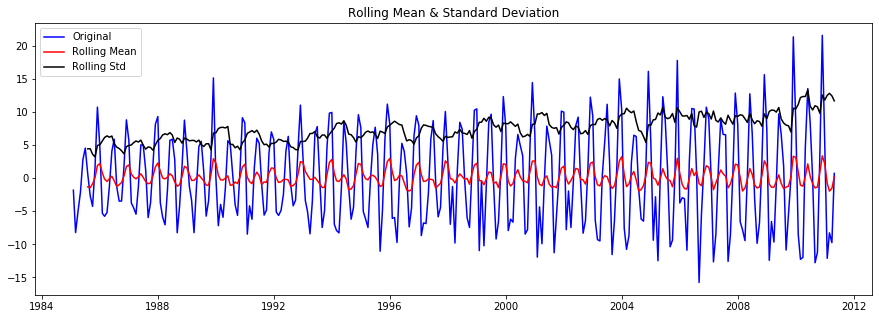

Results of Dickey Fuller Test:
Test Statistic                -6.352998e+00
p-value                        2.583276e-08
#Lags Used                     1.400000e+01
Number of Observations Used    3.010000e+02
Critical Value (1%)           -3.452263e+00
Critical Value (5%)           -2.871191e+00
Critical Value (10%)          -2.571912e+00
dtype: float64

Strong evidence against the null Hypothesis (H0), reject the null hypothesis. Data has no unit root and is stationary

Moving average mean is :  0.12597755760368662


In [89]:
Train['decomposed_val'] = Train['Power'] - Train['Power']. shift(1)
test_stationarity(Train['decomposed_val'].dropna())

In [90]:
Train.head()

,Power,decomposed_val
Date,,
1985-01-01,72.5052,NaN
1985-02-01,70.6720,-1.8332
1985-03-01,62.4502,-8.2218
1985-04-01,57.4714,-4.9788
1985-05-01,55.3151,-2.1563


In [151]:
Train.head()

,Power
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [149]:
import itertools

In [190]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA:-')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA:-
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [180]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(Train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:3718.456232020065
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:3216.855098604163
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1626.375729669378
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1571.4917193342048
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1572.9563805254616
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1519.8755613685464
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1575.055639018226
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1572.3965212507505
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:3295.738327898522
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2820.7918513660607
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1500.7204225323417
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1438.9508797187127
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1478.6489257967862
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1549.795694452162
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1446.2623077888588
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1439.4379398399167
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2144.574982285478
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1845.2505946569438

<div class="alert alert-block alert-info">
<H3> Plotting Autocorrelation and Partial Autocorrelation graph to get P and Q value</H3>
</div>

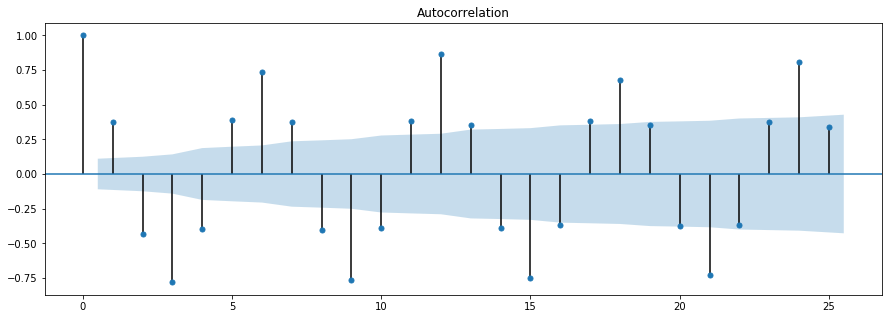

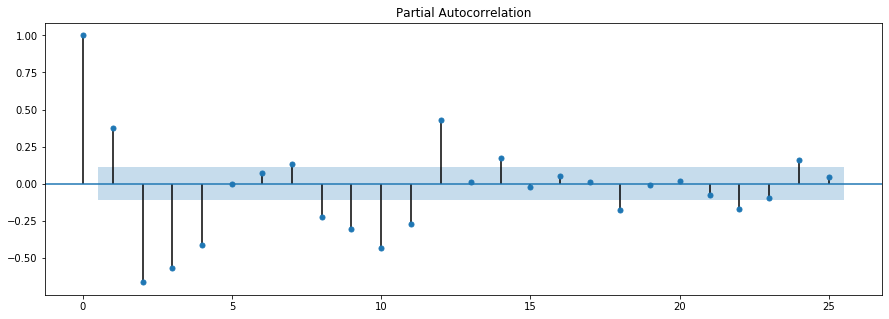

In [91]:
fig_first = plot_acf(Train["decomposed_val"].dropna())
fig_sec = plot_pacf(Train["decomposed_val"].dropna())

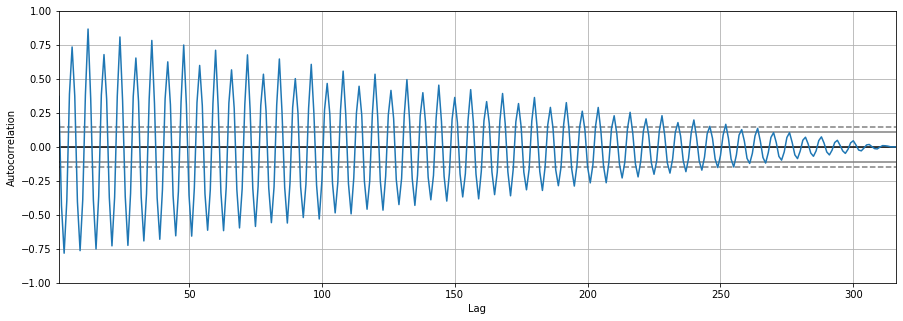

In [92]:
autocorrelation_plot(Train['decomposed_val'].dropna())

#### Implementation of the model

Since we know that data has seasonality factor, we'll use **SARIMAX** for forecasting <br>
> **SARIMAX** is Seasonal Autoregressive Integrated moving average 

In [196]:
model = sm.tsa.statespace.SARIMAX(Train['Power'], order=(1,1,1), seasonal_order=(0,1,1,12))
results = model.fit()

In [197]:
Test['power_predict'] = results.predict(start = 317, end = 399, dynamic= True)

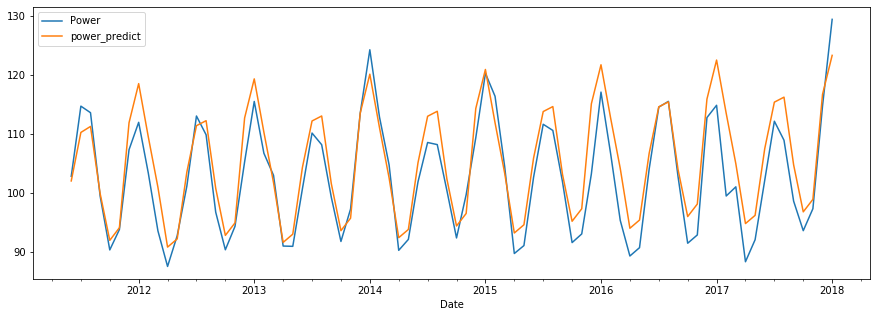

In [198]:
Test[['Power','power_predict']].plot()

In [199]:
Test.head()

,Power,power_predict
Date,,
2011-06-01,102.8204,102.038502
2011-07-01,114.7068,110.253066
2011-08-01,113.5958,111.269407
2011-09-01,99.4712,99.893566
2011-10-01,90.3566,91.975735


In [200]:
print ('MAE: ' + str(mean_absolute_error(Test['Power'],Test['power_predict'])))
print ('MSE: ' + str(mean_squared_error(Test['Power'],Test['power_predict'])))
print ('RMSE: ' + str(sqrt(mean_squared_error(Test['Power'],Test['power_predict']))))
print('MAPE: ',mean_absolute_percentage_error(Test['Power'],Test['power_predict']),"%")

MAE: 3.5580445171660458
MSE: 18.997247711023114
RMSE: 4.358583222908921
MAPE:  3.485460171396569 %


In [178]:
from sklearn.metrics import r2_score 
print("r2_score",r2_score(Test['Power'],Test['power_predict']))

r2_score 0.8095991592881263
